<a href="https://colab.research.google.com/github/Giaokeo/Giaokeo/blob/main/Cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar100
(x_train,y_train),(x_test,y_test)=cifar100.load_data()
y_test.shape

169017344/169001437 [==============================] - 11s 0us/step


(10000, 1)

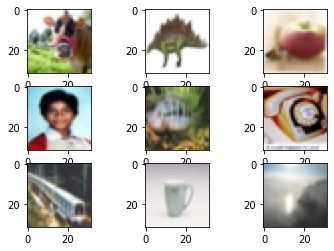

In [2]:
import matplotlib.pyplot as plt
for i in range (9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i])
plt.show()

In [3]:
from tensorflow.keras.utils import to_categorical

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255 #x_train/=255
x_test = x_test/255

y_train = to_categorical(y_train,100)
y_test=to_categorical(y_test,100)

In [6]:
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential, load_model
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer = 'he_uniform',padding = 'same',input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer = 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer = 'he_uniform',padding = 'same'))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer = 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer = 'he_uniform',padding = 'same'))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer = 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation = 'relu',kernel_initializer='he_uniform'))
model.add(Dense(100,activation = 'softmax'))

opt = SGD(learning_rate=0.01,momentum = 0.9)
model.compile(opt,loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model.fit(x_train,y_train,epochs=3,batch_size =64,validation_data=(x_test,y_test),verbose=1)

Epoch 1/3
782/782 [==============================] - 381s 487ms/step - loss: 4.1275 - accuracy: 0.0749 - val_loss: 3.8076 - val_accuracy: 0.1183
Epoch 2/3
782/782 [==============================] - 372s 476ms/step - loss: 3.3549 - accuracy: 0.1925 - val_loss: 3.2331 - val_accuracy: 0.2189
Epoch 3/3
782/782 [==============================] - 378s 484ms/step - loss: 2.9158 - accuracy: 0.2739 - val_loss: 2.7895 - val_accuracy: 0.3055


In [7]:
model.save('final.h6')
model5= load_model('final.h6')

INFO:tensorflow:Assets written to: final.h6/assets


(1, 32, 32, 3)

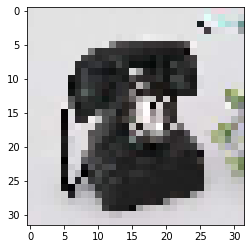

In [9]:
from keras.preprocessing.image import  load_img,img_to_array
import numpy as np

filename = 'dienthoai.jpg'
img = load_img(filename,target_size=(32,32))
img.size
plt.imshow(img)
img=img_to_array(img)
img=np.reshape(img,(1,32,32,3))
img = img.astype('float32')
img = img/255
img.shape

In [11]:
np.argmax(model5.predict(img),axis=1)

array([86])

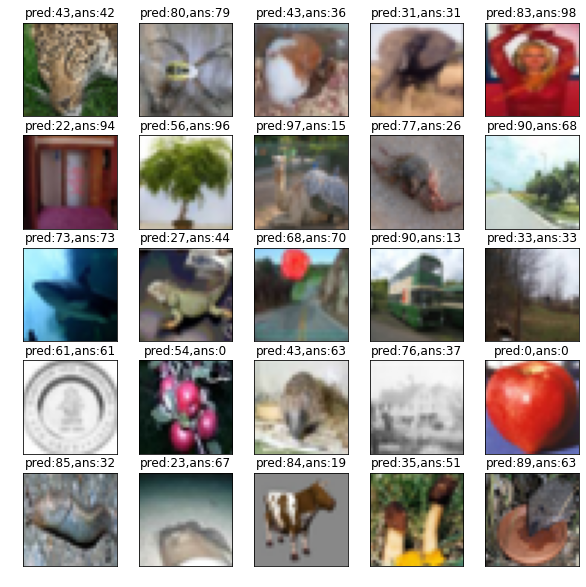

In [12]:
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)
classes_x1=np.argmax(y_test,axis=1)
plt.figure(figsize=(10,10))
for i in range(25):
    rand_num=np.random.randint(0,10000)
    cifar_img=plt.subplot(5,5,i+1)
    plt.imshow(x_test[rand_num])
    # Erase the value of a tick
    plt.xticks(color="None")
    plt.yticks(color="None")
    # Erase the tick x-axis and y-axis
    plt.tick_params(length=0)
  
    plt.title('pred:{0},ans:{1}'.format(classes_x[rand_num],classes_x1[rand_num]))
 
plt.show()